# Connectar una base de dades  MySQL desde Python

------


*Prof. Antoni Oliver Gelabert - Administracio de Sistemes Gestors de Bases de Dades (CIFP Pau Casesnoves, Curs 2022/2023)*

Modificat de la versio anterior

Prof. Antoni Oliver Gelabert - Sistemes de Gestio Empresarial (CIFP Pau Casesnoves, Curs 2021/2022)


-----------

1. instalam la llibreria del connector python-mysql emprant la terminal CLI (si no la tenim ja instalada)

In [1]:
!pip install mysql-connector-python

2. Si estem en Linux, i encara no tenim la base de dades sakila importada a mysql, l'haurem de descarregar. Podem fer-ho amb wget a la terminal bash d'un sistema Linux (per exemple, Ubuntu). Si estem en Windows, podem pensar en descarregar el susbsistema Linux per Windows (WSL) i dur a terme la feina des d'alla. L'ordre WGET es troba tambe en el paquet Cygwin pensat per Windows. Tambe podem emprar una maquina virtual amb Ubuntu 20.04 LTS com a sistema convidat o be podem cercar una solucio amb docker. No obstant aixo, la base de dades es pot descarregar directament tambe desde la URL de la pagina especificada a continuacio de wget. Pensem que si empram Jupyter, el simbol d'exclamacio permet interactuar amb comandes interpretables per al SHELL. Aprofitem per tambe descomprimir la base de dades, una vegada s'ha descarregat 

In [2]:
!wget https://downloads.mysql.com/docs/sakila-db.zip
!unzip sakila-db.zip

--2021-11-10 06:39:38--  https://downloads.mysql.com/docs/sakila-db.zip
Resolving downloads.mysql.com (downloads.mysql.com)... 137.254.60.14
Connecting to downloads.mysql.com (downloads.mysql.com)|137.254.60.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729386 (712K) [application/octet-stream]
Saving to: ‘sakila-db.zip’

sakila-db.zip       100%[===================>] 712.29K  1.17MB/s    in 0.6s    

2021-11-10 06:39:39 (1.17 MB/s) - ‘sakila-db.zip’ saved [729386/729386]

Archive:  sakila-db.zip
   creating: sakila-db/
  inflating: sakila-db/sakila-data.sql  
  inflating: sakila-db/sakila-schema.sql  
  inflating: sakila-db/sakila.mwb    


3. Si encara no ho hem fet, cal instalar el Servidor MySQL. Aixo a Ubuntu es pot fer directament amb l'ordre apt install

In [3]:
!apt install mysql-server 2> /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libencode-locale-perl libevent-core-2.1-6
  libfcgi-perl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl
  libhttp-date-perl libhttp-message-perl libio-html-perl
  liblwp-mediatypes-perl libtimedate-perl liburi-perl mysql-client-5.7
  mysql-client-core-5.7 mysql-server-5.7 mysql-server-core-5.7
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libencode-locale-perl libevent-core-2.1-6
  libfcgi-perl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl
  libhttp-date-perl libhttp-message-perl libio-html-perl
  liblwp-mediatypes-perl libtimedate-perl liburi-perl mysql-client-5.7
  mysql-client-core-5.7 mysql-server mysql-server-5.7 mysql-server-core-5.7
0 upgraded, 19 

4. Tot seguit importam ara ja la BBDD sakila a MySQL. Primer l'esquema, llavors les dades. Fem servir un inici de sessio sense password per agilitzar, pero en un cas real sempre s'ha de tenir un bon password

In [6]:
!mysql -u root -p '' sakila < sakila-db/sakila-schema.sql
!mysql -u root -p '' sakila < sakila-db/sakila-data.sql

mysql  Ver 14.14 Distrib 5.7.36, for Linux (x86_64) using  EditLine wrapper
Copyright (c) 2000, 2021, Oracle and/or its affiliates.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Usage: mysql [OPTIONS] [database]
  -?, --help          Display this help and exit.
  -I, --help          Synonym for -?
  --auto-rehash       Enable automatic rehashing. One doesn't need to use
                      'rehash' to get table and field completion, but startup
                      and reconnecting may take a longer time. Disable with
                      --disable-auto-rehash.
                      (Defaults to on; use --skip-auto-rehash to disable.)
  -A, --no-auto-rehash 
                      No automatic rehashing. One has to use 'rehash' to get
                      table and field completion. This gives a quicker start of
                      mysql and disables rehashing on reconnect.
  --auto-vertic

5. Ara, importem la llibreria del connector python-mysql que hem instalat al pas 1. Aprofitem per connectar amb la base de dades sakila, que ja ha estat importada al pas anterior.

In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="sakila"
)

6. Salvam la consulta a la taula actors dins una llista anomenada myresult i amb un loop obtenim per pantalla les dades de la taula.

In [47]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM actor")
myresult = mycursor.fetchall()

for x in myresult:
    print(x)

(1, 'PENELOPE', 'GUINESS', datetime.datetime(2006, 2, 15, 4, 34, 33))
(2, 'NICK', 'WAHLBERG', datetime.datetime(2006, 2, 15, 4, 34, 33))
(3, 'ED', 'CHASE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(4, 'JENNIFER', 'DAVIS', datetime.datetime(2006, 2, 15, 4, 34, 33))
(5, 'JOHNNY', 'LOLLOBRIGIDA', datetime.datetime(2006, 2, 15, 4, 34, 33))
(6, 'BETTE', 'NICHOLSON', datetime.datetime(2006, 2, 15, 4, 34, 33))
(7, 'GRACE', 'MOSTEL', datetime.datetime(2006, 2, 15, 4, 34, 33))
(8, 'MATTHEW', 'JOHANSSON', datetime.datetime(2006, 2, 15, 4, 34, 33))
(9, 'JOE', 'SWANK', datetime.datetime(2006, 2, 15, 4, 34, 33))
(10, 'CHRISTIAN', 'GABLE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(11, 'ZERO', 'CAGE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(12, 'KARL', 'BERRY', datetime.datetime(2006, 2, 15, 4, 34, 33))
(13, 'UMA', 'WOOD', datetime.datetime(2006, 2, 15, 4, 34, 33))
(14, 'VIVIEN', 'BERGEN', datetime.datetime(2006, 2, 15, 4, 34, 33))
(15, 'CUBA', 'OLIVIER', datetime.datetime(2006, 2, 15, 4, 34,

7. Mostram nomes les 10 primeres tuples-files-registres

In [48]:
myresult[:10]

[(1, 'PENELOPE', 'GUINESS', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (2, 'NICK', 'WAHLBERG', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (3, 'ED', 'CHASE', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (4, 'JENNIFER', 'DAVIS', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (5, 'JOHNNY', 'LOLLOBRIGIDA', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (6, 'BETTE', 'NICHOLSON', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (7, 'GRACE', 'MOSTEL', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (8, 'MATTHEW', 'JOHANSSON', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (9, 'JOE', 'SWANK', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (10, 'CHRISTIAN', 'GABLE', datetime.datetime(2006, 2, 15, 4, 34, 33))]

8. Mostrem nomes la tupla 1 (en realitat es la segona tupla, ja que python compta a partir del zero)

In [49]:
myresult[1]

(2, 'NICK', 'WAHLBERG', datetime.datetime(2006, 2, 15, 4, 34, 33))

9. Mostrem l'atribut 2 (en realitat es el 3r perque python sempre compta el 0 com a 1r. Per tant, cognom de l'actor) de la tupla 5

In [50]:
myresult[5][2]

'NICHOLSON'

10. Importam la llibreria Pandas com a pd i guardam el resultat obtingut en la consulta dins un Dataframe 

In [51]:
import pandas as pd
df =[]
df = pd.DataFrame(myresult, columns=['actor_id','first_name','last_name','timestamp'])

11. Obtenim les 5 primeres linies del dataframe:

In [55]:
df.head()

,actor_id,first_name,last_name,timestamp
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


## Part II. Ara treballam amb la taula de pelicules, film.

12. Primer de tot importarem el nom de files de manera automatica i els guardarem dins labels a partir de la consulta "desc film" per obtenir el nom de les columnes

In [57]:
labels=[]
mycursor = mydb.cursor()
mycursor.execute("desc film")
myresult2 = mycursor.fetchall()
for x in myresult2:
    print(x[0])
    labels.append(x[0])

film_id
title
description
release_year
language_id
original_language_id
rental_duration
rental_rate
length
replacement_cost
rating
special_features
last_update


13. Ara, definim el dataframe de pelicules aprofitant la informacio salvada en labels per ja assignar automaticament la fila de noms de columnes a les dades. Tambe salvam la consulta sobre la taula de pelicules (films)

In [58]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM film")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult, columns=labels)

14. Observem les 5 primeres tuples del resutlat del DATAFRAME amb l'instruccio head

In [59]:
df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Deleted Scenes, Behind the Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Commentaries, Behind the Scenes}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42


15. Obtinguem una estadistica de la durada de les pelicules dins la base de dades sakila

In [67]:
df['length'].describe()

count    1000.000000
mean      115.272000
std        40.426332
min        46.000000
25%        80.000000
50%       114.000000
75%       149.250000
max       185.000000
Name: length, dtype: float64

16. Podem veure que els resultats indiquen una mitjana de 115 minuts de durada per unes 1000 pelicules. La desviacio tipica es de 40 minuts i la durada va entre els 46 minuts i els 185 minuts com a maxim.

17. Anem a veure mes detalls d'aquesta distribucio generant un histograma. Primer de tot importem matplotlib. Fer un histograma es tan simple com aixo:

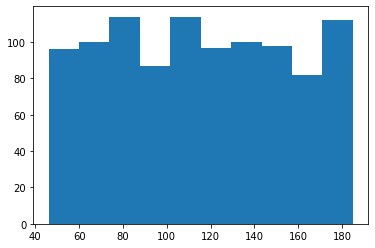

In [68]:
import matplotlib.pyplot as plt
plt.hist(df['length']);

18. No obstant aixo, si volem caracteritzar el grafic amb titols als eixos, amb una amplada de les barres especifica diferent a la predeterminada, i a mes volem guardar el resultat en una figura dins el mateix directori d'aquest notebook, haurem de ser mes especifics:

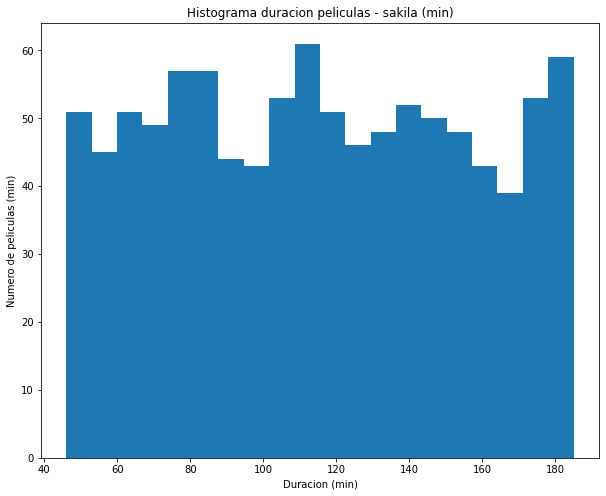

In [19]:
plt.figure(figsize=[10,8])
plt.title('Histograma duracion peliculas - sakila (min)') 
plt.xlabel('Duracion (min)')
plt.ylabel('Numero de peliculas (min)')
plt.hist(df['length'],bins=20);
plt.savefig("histograma_duracion_peliculas_sakila.png",dpi=200)

#### Mes opcions:
https://www.datacamp.com/community/tutorials/histograms-matplotlib

Tutorial W3 sobre el maneig de SQL a traves de Python

https://www.w3schools.com/python/python_mysql_getstarted.asp 